# The World Bank World Development Indicators dataset

The World Bank World Development Indicators dataset contains data on 217 world economies for over half a century, from 1960 up until 2015. The data contains hundreds of indicators from population, electricity consumption and CO2 emissions to literacy rates, unemployment and mortality rates. 

In [ ]:
# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

Suppose you needed to repeat the same process done in the previous exercise to many, many rows of data. Rewriting your code again and again could become very tedious, repetitive, and unmaintainable.

Here we will create a function to house the code we wrote earlier to make things easier and much more concise. Why? This way, we only need to call the function and supply the appropriate lists to create the dictionaries.

In [ ]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

# Print rs_fxn
print(rs_fxn)

This time, we're going to use the lists2dict() function we defined in the last part to turn a bunch of lists into a list of dictionaries with the help of a list comprehension.

The lists2dict() function has already been preloaded, together with a couple of lists, feature_names and row_lists. feature_names contains the header names of the World Bank dataset and row_lists is a list of lists, where each sublist is a list of actual values of a row from the dataset.

The goal is to use a list comprehension to generate a list of dicts, where the keys are the header names and the values are the row entries.

In [ ]:
# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])

We've zipped lists together, created a function to house our code, and even used the function in a list comprehension to generate a list of dictionaries. 

We will now use all of these to convert the list of dictionaries into a pandas DataFrame. We will see how convenient it is to generate a DataFrame from dictionaries with the DataFrame() function from the pandas package.

In [ ]:
# Import the pandas package
import pandas as pd

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)

# Print the head of the DataFrame
print(df.head())

Having played around with some of the data, we're now going to step back a bit and look at importing the dataset, which is pretty large. For a large dataset, we can use an iterator to load it in chunks. We can also write a generator to load it in line by line and one of the really cool things about this method is that if the data is streaming, that is, if new lines are being written to the file you're reading, this method will keep on reading and processing the file until there are no lines left for it to read. 

# Using Python generators for streaming data

Sometimes, data sources can be so large in size that storing the entire dataset in memory becomes too resource-intensive. We will process the first 1000 rows of a file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset.

The csv file 'world_dev_ind.csv' is in the current directory. To begin, we need to open a connection to this file using what is known as a context manager. For example, the command with open('datacamp.csv') as datacamp binds the csv file 'datacamp.csv' as datacamp in the context manager. Here, the with statement is the context manager, and its purpose is to ensure that resources are efficiently allocated when opening a connection to a file.

In [1]:
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

What if, however, you want to do this for the entire file?

In this case, it would be useful to use generators. Generators allow users to lazily evaluate data. This concept of lazy evaluation is useful when you have to deal with very large datasets because it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once.

In [2]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
        
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



Note that since a file object is already a generator, we don't have to explicitly create a generator object with the read_large_file() function. However, it is still good to practice how to create generators.

Now let's use generator function to process the World Bank dataset like we did previously. We will process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset. 

In [ ]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

# Using pandas' read_csv iterator for streaming data

Now let's use the pandas function read_csv, along with its chunksize argument in order to read in the World Indicator data in chunks, process each chunk and aggregate. Herein, we'll do so in order to look at specific indicators in specific countries and to plot the results over all the years for which the relevant data exists. We'll then try our hands at writing a function to perform the same task which will save so much work when we want to look at the data for a different country.

Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package, you can do pd.read_csv(filename, chunksize=100). This creates an iterable reader object, which means that you can use next() on it.

In [3]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('ind_pop.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

We will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk.

To process the data, we will create another DataFrame composed of only the rows from a specific country. We will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. Finally, we will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

In [4]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


We will be using a list comprehension to create the values for a new column 'Total Urban Population' from the list of tuples that we generated earlier. Recall from the previous exercise that the first and second elements of each tuple consist of, respectively, values from the columns 'Total Population' and 'Urban population (% of total)'. The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each tuple. Furthermore, because the 2nd element is a percentage, we need to divide the entire result by 100, or alternatively, multiply it by 0.01.

We will also plot the data from this new column to create a visualization of the urban population data.

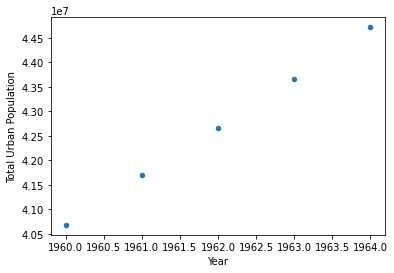

In [9]:
import matplotlib.pyplot as plt

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

This time, we will aggregate the results over all the DataFrame chunks in the dataset. This basically means we will be processing the entire dataset now.

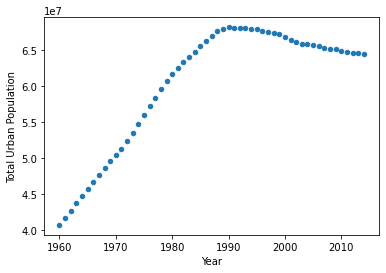

In [10]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Concatenate DataFrame chunk to the end of data: data
    data = pd.concat([data, df_pop_ceb])

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

Now we will put all the code for processing the data into a single function so that we can reuse the code without having to rewrite the same things all over again.

We're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, and the country code of the rows we want to process in the dataset.

Because all of the previous code we've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:

* Loading of the file chunk by chunk,
* Creating the new column of urban population values, and
* Plotting the urban population data.

That's a lot of work, but the function now makes it convenient to repeat the same process for whatever file and country code we want to process and visualize!

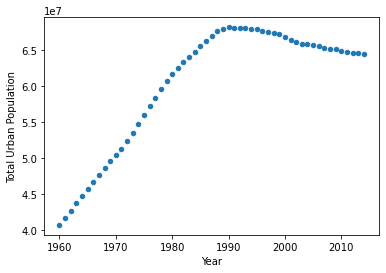

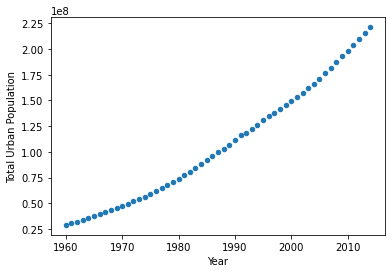

In [11]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
        
        # Concatenate DataFrame chunk to the end of data: data
        data = pd.concat([data, df_pop_ceb])

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')